# 데이터시각화01
1. 학과: AI소프트웨어
2. 학번: 2018315006
3. 성명: 정성엽

## 소개
"Indian Summers - Over the years" 데이터셋을 사용하여 수업시간에 배운 시각화 기법들을 활용한 분석 보고서를 작성함. 다양한 각도(시간, 분포, 관계)에서 총 8개의 그래프를 시각화 하였음.


### ▼ 목차
1. 라이브러리 소개  
   1-1. 데이터 읽기  
   1-2. 상태 확인  
   1-3. 데이터 탐구  
2. 데이터 전처리  
   2-1. 문자열을 Datetime으로 변환하기  
   2-2. 결측값 확인하기  
   2-3. 결측값 처리하기  
   2-4. 전처리 비교 결과 분석  
3. 그래프 시각화    	
   3-1. 시간 시각화
       3-1-1. 각 도시 별 최대 기온, 최소 기온, 보통 기온, 최대 체감온도, 최소 체감온도, 보통 체감온도 비교 그래프
       3-1-2. 연간 기온과 체감온도 그래프
       3-1-3. 연도별 온도에 따른 도시 별 습도 그래프
   3-2. 분포 시각화
       3-2-1. 해수면의 변화로 각 도시 별 날씨 특징 그래프
       3-2-2. 각 도시의 월 별 이슬점 비교 그래프
   3-3. 관계 시각화
       3-3-1. 기본 히트맵 시각화
       3-3-2. Clustermap 히트맵 시각화
       3-3-3. 중복 제거 히트맵 시각화
       3-3-4. 운량에 따른 습도와 체감온도 변화 그래프 

## 1. 라이브러리 소개

In [1]:
# 라이브러리 가져오기
!pip install pywaffle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from pywaffle import Waffle
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 40.9 MB/s eta 0:00:00
Mounted at /content/drive


**1. import numpy as np:** python에서 수치 계산을 위한 라이브러리  
**2. import matplotlib.pyplot as plt:** python에서 그래프를 그리기 위한 라이브러리  
**3. import seaborn as sns:** matplotlib을 기반으로 한 시각화 라이브러리 (쉽게 시각화 쉽게 가능하게 함)  
**4. import pandas as pd:** 데이터 처리와 분석을 위한 라이브러리  
**5. import plotly.express as px:** plotly: 라이브러리를 기반으로 한 간단한 인터페이스를 제공하는 시각화 라이브러리  
**6. from pywaffle import Waffle:** Waffle chart를 그리기 위한 라이브러리  
**7. from google.colab import drive:** 구글 코랩에서 제공하는 라이브러리로 구글 코랩과 구글 드라이브를 연동하는 기능을 제공  


#### 1-1. 데이터 읽기

In [2]:
# 데이터 읽기
filename = '/content/drive/MyDrive/Colab_Notebooks/데이터 시각화/Indian Summers - Over the years.csv'
df = pd.read_csv(filename, encoding='cp949')
df.head()

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
0,New Delhi,2021-04-01,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.60,22.8,272.9,1002.8,0.0,3.1,2021-04-01 06:11:12,2021-04-01 18:39:13,0.60,Clear,Clear conditions throughout the day.
1,New Delhi,2021-04-02,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4,275.0,1006.2,0.0,3.5,2021-04-02 06:10:04,2021-04-02 18:39:46,0.65,Clear,Clear conditions throughout the day.
2,New Delhi,2021-04-03,34.8,14.6,26.0,32.2,14.6,25.1,1.3,23.18,16.5,127.5,1008.8,1.4,3.5,2021-04-03 06:08:55,2021-04-03 18:40:19,0.70,Clear,Clear conditions throughout the day.
3,New Delhi,2021-04-04,36.8,16.9,27.1,34.2,16.9,26.0,4.8,28.00,18.3,157.6,1009.5,2.6,3.2,2021-04-04 06:07:47,2021-04-04 18:40:53,0.76,Clear,Clear conditions throughout the day.
4,New Delhi,2021-04-05,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,13.5,100.4,1007.8,38.4,3.1,2021-04-05 06:06:39,2021-04-05 18:41:26,0.81,Partially cloudy,Partly cloudy throughout the day.


#### 1-2. 데이터 상태 확인

In [3]:
# 데이터 상태 확인
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(13650, 20)
Index(['City', 'Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              13650 non-null  object 
 1   Date              13650 non-null  object 
 2   tempmax           13615 non-null  float64
 3   tempmin           13615 non-null  float64
 4   temp              13605 non-null  float64
 5   feelslikemax      13614 non-null  float64
 6   feelslikemin      13614 non-null  float64
 7   feelslike         13604 non-null  float64
 8   dew               13605 non-null  float64
 9   humidity          13605 non-null  float64
 10  windspeed     

**1. df.shape:** 데이터프레임 df의 행과 열의 개수를 출력  
**2. df.columns :** 이 코드는 데이터프레임 df의 모든 열(column) 이름을 출력  
**3. df.info() :** 이 코드는 데이터프레임 df의 각 열(column)의 정보를 출력  
**4. df.describe() :** 이 코드는 데이터프레임 df의 각 열(column)에 대한 기술 통계(descriptive statistics) 정보를 출력함. 출력값은 평균, 표준편차, 최소값, 25%, 50%, 75%, 최대값 등임. 이 정보를 통해 데이터의 대략적인 분포와 특징을 파악  

> 이를 바탕으로 13650개의 행 개수, 20개의 열 개수 확인할 수 있었음. 또 전체적인 data type을 알 수 있었고 여기서 Date, sunrise, sunset이 type이 object임을 확인함. 그러나 날짜, 시간은 타입이 datetime으로 되어야 하므로 전처리 과정에서 타입 변경하기로 결정. 또, describe()를 통해 데이터의 대략적인 분포와 특징을 파악할 수 있었음.



#### 1-3. 데이터 탐구
데이터를 살펴보면 2012년에서 2018년의 데이터라는 것을 확인할 수 있다.     
또, 나중에 그래프에서 알 수 있지만 4월에서 6월까지의 데이터라는 것을 확인할 수 있다. 즉, 계절이 여름이고 여름의 기온, 체감온도, 이슬점, 습도, 바람, 해수면 기압, 운량 등을 나타낸 데이터임을 알 수 있다.

- City	도시
- Date	날짜
- tempmax 최대기온
- tempmin 최소기온	 
- temp 기온 	 
- feelslikemax	체감 최대 온도
- feelslikemin	체감 최소 온도
- feelslike	체감 온도
- dew	이슬점
- humidity 습도
- windspeed	바람 속도
- winddir	바람의 방향
- sealevelpressure 해수면기압
- cloudcover 운량
- visibility 시정
- sunrise	일출
- sunset	일몰
- moonphase	달의 위상
- conditions 기상 상태
- description 기상 묘사

## 2. 데이터 전처리

### 2-1. object Type을 Datetime으로 변환하기
앞서 말했듯이 object 타입을 Datetime 타입으로 변환시켜야 한다.  
그전에 날짜를 오름차순으로 정렬했고 Date열에서 년도와 월을 따로 추출하여 Year과 Month 열을 따로 만들었다.

In [4]:
# 날짜 오름차순 정렬
df = df.sort_values(by='Date')

# object Type을 Datetime으로 변환하기
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d') 
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df['sunrise'] = pd.to_datetime(df['sunrise'], format='%Y-%m-%d %H:%M:%S')
df['sunset'] = pd.to_datetime(df['sunset'], format='%Y-%m-%d %H:%M:%S')

df.head()

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description,Month,Year
13013,Bengaluru,2012-04-01,32.3,21.0,26.3,31.6,21.0,25.9,14.8,54.40,...,NaN,33.7,6.6,2012-04-01 06:15:44,2012-04-01 18:31:20,0.33,Partially cloudy,Partly cloudy throughout the day.,4,2012
13559,Hyderabad,2012-04-01,35.9,22.1,29.8,35.4,22.1,29.4,14.8,44.19,...,NaN,18.1,5.6,2012-04-01 06:10:35,2012-04-01 18:29:28,0.33,Clear,Clear conditions throughout the day.,4,2012
12922,Ahmedabad,2012-04-01,42.1,26.1,33.6,39.4,26.1,32.6,12.1,31.80,...,NaN,1.4,4.7,2012-04-01 06:31:51,2012-04-01 18:55:15,0.33,Clear,Clear conditions throughout the day.,4,2012
12376,Jaipur,2012-04-01,39.1,24.1,31.6,37.5,24.1,30.4,9.9,27.23,...,NaN,11.9,4.5,2012-04-01 06:17:23,2012-04-01 18:44:09,0.33,Clear,Clear conditions throughout the day.,4,2012
12740,Indore,2012-04-01,38.1,24.1,31.4,35.4,24.1,29.9,6.5,22.58,...,1008.1,23.8,3.8,2012-04-01 06:18:56,2012-04-01 18:42:04,0.33,Partially cloudy,Partly cloudy throughout the day.,4,2012


이와 같이 성공적으로 Date는 오름차순으로 정렬되었으며, Date열에서 년도와 월을 따로 추출한 Year과 Month 열이 새로 만들어진 것을 확인할 수 있다. 또, object 타입을 Datetime 타입으로 변환시켰으므로 한번 확인해보았다.

In [5]:
# Date의 타입이 Datetime으로 잘 변경 되었는지 확인인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13650 entries, 13013 to 727
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   City              13650 non-null  object        
 1   Date              13650 non-null  datetime64[ns]
 2   tempmax           13615 non-null  float64       
 3   tempmin           13615 non-null  float64       
 4   temp              13605 non-null  float64       
 5   feelslikemax      13614 non-null  float64       
 6   feelslikemin      13614 non-null  float64       
 7   feelslike         13604 non-null  float64       
 8   dew               13605 non-null  float64       
 9   humidity          13605 non-null  float64       
 10  windspeed         13605 non-null  float64       
 11  winddir           13600 non-null  float64       
 12  sealevelpressure  10631 non-null  float64       
 13  cloudcover        13605 non-null  float64       
 14  visibility        13

성공적으로 object 타입을 Datetime 타입으로 변환을 완료하였다.

### 2-2. 결측값 확인하기

결측값을 확인하기 위해 df.isnull()을 통해 간단히 알아 보았다.

In [6]:
# 결측값 확인
df.isnull()

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description,Month,Year
13013,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
13559,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
12922,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
12376,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
12740,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1273,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
90,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


그러나 이는 데이터가 조금 있을 때나 부분적으로 확인할 때 자주 쓰이고 이렇게 큰 데이터에서는 정확한 확인이 어렵다. 이러한 이유로 df.isnull().sum()을 통해 결측값 개수를 확인해보았다.

In [7]:
# 결측값 개수 확인
df.isnull().sum()

City                   0
Date                   0
tempmax               35
tempmin               35
temp                  45
feelslikemax          36
feelslikemin          36
feelslike             46
dew                   45
humidity              45
windspeed             45
winddir               50
sealevelpressure    3019
cloudcover            45
visibility            45
sunrise                0
sunset                 0
moonphase              0
conditions            45
description           45
Month                  0
Year                   0
dtype: int64

결과적으로 tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, windspeed, winddir, sealevelpressure, cloudcover, visibility, conditions, description 열의 결측값 개수를 확인할 수 있었다.     
여기서 유난히 결측값을 많이 가진 열을 알 수 있었는데 바로 sealevelpressure 열이다.   
Sealevelpressure 열은 3019개의 결측값을 지니고 있었다.       
결과적으로 데이터가 결측값을 지니고 있다는 것을 확인했고 결측값 처리를 하기로 했다.

### 2-3. 결측값 처리하기

결측값 처리는 더 나은 처리 결과를 얻기 위해 다양한 방법으로 결측값 처리를 했다.  
1. 결측값을 각 열의 평균값으로 대체하는 방법.   
2. 35~50개의 결측값을 지닌 녀석들의 행을 dropna를 활용하여 날려버리고 3019개의 결측값을 지닌 sealevelpressure은 평균값으로 결측값을 처리한 방법이다.  

In [8]:
# 결측값 처리
# 더 나은 결과를 얻기 위해 결측값을 다양한 방법으로 처리 해보았습니다.

# 결측값을 각 열의 평균 값으로 대체: df_mean
df_mean = df.fillna(df.mean())

# 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir', 
# 'cloudcover', 'visibility','conditions', 'description' 컬럼에는 행에 결측값이 존재하여 해당 행들 삭제: df_dropna
df_dropna = df.dropna(subset = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir', 'cloudcover', 'visibility',
                    'conditions', 'description'])

# df_dropna -> 2968개의 결측값를 가지고 있는 sealevelpressure은 mean(평균)으로 결측값 대체
df_dropna_mean = df_dropna['sealevelpressure'].mean()
df_dropna['sealevelpressure'] = df_dropna['sealevelpressure'].fillna(df_dropna_mean)

<ipython-input-8-f4c687c0d618>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_mean = df.fillna(df.mean())
<ipython-input-8-f4c687c0d618>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean = df.fillna(df.mean())
<ipython-input-8-f4c687c0d618>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['sealevelpressure'] = df_dropna['sealevelpressure'].fillna(df_dropna_mean)


print(df.shape)
결과: (13650, 20)

In [9]:
# 결측값 -> 평균 : df_mean
print(df_mean.shape)
print(df_mean.isnull().sum())

(13650, 22)
City                 0
Date                 0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
sunrise              0
sunset               0
moonphase            0
conditions          45
description         45
Month                0
Year                 0
dtype: int64


그러나 conditions, description의 결측값 처리를 제대로 수행하지 못함. 이러한 이유로 이것들은 dropna()를 활용하여 결측값 처리

In [10]:
# df_mean이 2개 열 결측값 처리 실패하여 2개 특정 열은 dropna()를 활용하여 결측값을 처리 하였다.
# 변수명 변경 (df_mean -> df_mean_dropna)
df_mean_dropna = df_mean.dropna(subset = ['conditions', 'description'])
print(df_mean_dropna.isnull().sum())

City                0
Date                0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
Month               0
Year                0
dtype: int64


df_mean_dropna 결측값 처리에 성공

In [11]:
# 35~50개의 결측값을 지닌 녀석들의 행을 dropna를 활용하여 날려버리고 
# 3019개의 결측값을 지닌 sealevelpressure은 평균값으로 결측값을 처리한 방법: df_dropna
print(df_dropna.shape)
print(df_dropna.isnull().sum())

(13599, 22)
City                0
Date                0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
Month               0
Year                0
dtype: int64


df_dropna 결측값 처리에 성공

### 2-4. 전처리 비교 결과 분석
> df, df_mean_dropna, df_dropna를 전체적으로 시각화 시켜서 비교해보자.

In [12]:
# # Indian Summers 데이터 df 시각화
# sns.pairplot(df)
# plt.title("Indian Summers_df")
# plt.show()

In [13]:
# # Indian Summers 데이터 df_mean_dropna 시각화
# sns.pairplot(df_mean_dropna)
# plt.title("Indian Summers_df_mean_dropna")
# plt.show()

In [14]:
# # Indian Summers 데이터 df_dropna 시각화
# sns.pairplot(df_dropna)
# plt.title("Indian Summers_df_dropna")
# plt.show()

> 전처리 데이터 비교 결과 분석
  1. 사실 우선으로 봐야할 녀석은 sealevelpressure이다. 보통 결측값이 35개~50개인데, sealevelpressure 이 녀석은 결측값이 3019개로 가장 많기 때문이다.
  2. 그래서 sealevelpressure를 위 비교한 그래프들에서 살펴보면 df(기본)와 df_mean_dropna(결측값을 전부 평균값으로 결측값을 처리하고 실패한 열은 dropna를 활용한 녀석)은 별로 차이가 없음을 확인 할 수 있다. 
  3. 그러나 df, df_mean_dropna와와 다르게 df_dropna(35~50개의 결측값을 지닌 녀석들의 행을 dropna를 활용하여 날려버리고 3019개의 결측값을 지닌 sealevelpressure은 평균값으로 결측값 처리한 녀석임)는 sealevelpressure이 안정적으로 구성되어 짐을 확인할 수 있다.
  4. 또한, 위에서 describe한 결과를 비교해보면 확실한 차이를 찾아볼 수 있다.

## 3. 그래프 시각화
1. 그래프는 쉽고 누구나 알아볼 수 있을 정도의 그래프를 그려내어 시각화 시키는 것을 목표로 한다. 
2. 다양한 각도(시간, 분포, 관계)에서 총 8개의 그래프를 시각화 하였다.

### 3-1. 시간 시각화

#### 3-1-1. 각 도시 별 최대 기온, 최소 기온, 보통 기온, 최대 체감온도, 최소 체감온도, 보통 체감온도 비교 그래프

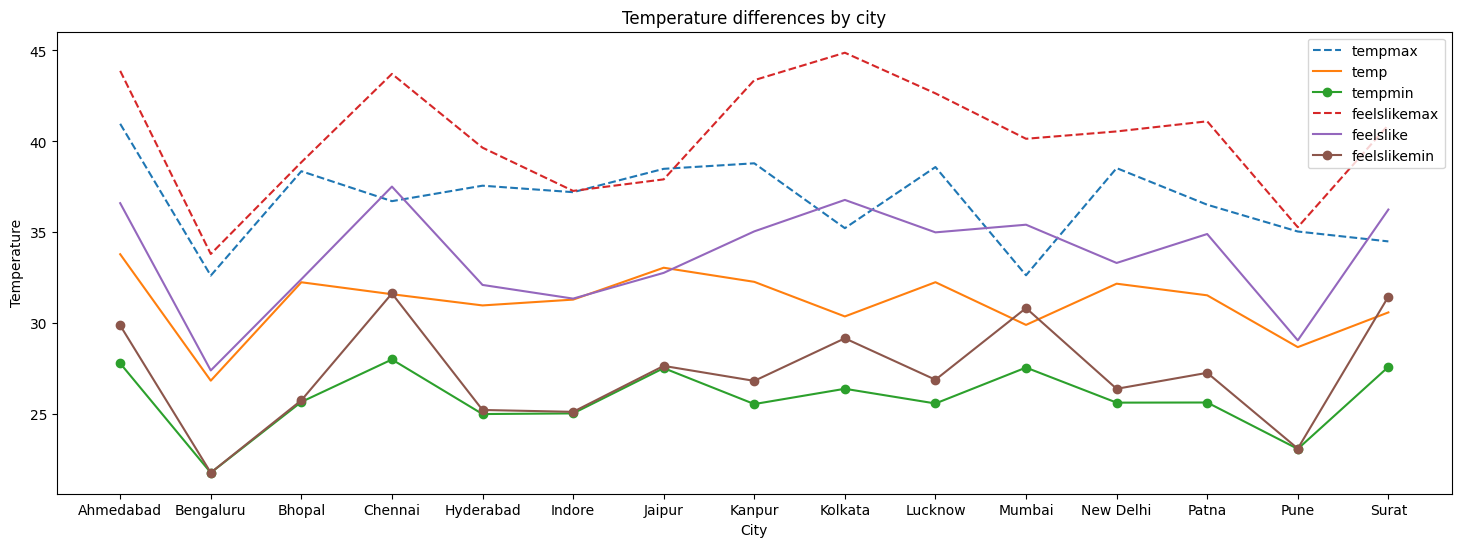

In [15]:
# 각 도시 별 최대 기온, 최소 기온, 보통 기온, 최대 체감온도, 최소 체감온도, 보통 체감온도 비교 그래프
plt.figure(figsize=(18,6))
plt.plot(df_dropna.groupby('City')['tempmax'].mean(), label='tempmax', linestyle='--')
plt.plot(df_dropna.groupby('City')['temp'].mean(), label='temp')
plt.plot(df_dropna.groupby('City')['tempmin'].mean(), label='tempmin', marker='o')
plt.plot(df_dropna.groupby('City')['feelslikemax'].mean(), label='feelslikemax', linestyle='--')
plt.plot(df_dropna.groupby('City')['feelslike'].mean(), label='feelslike')
plt.plot(df_dropna.groupby('City')['feelslikemin'].mean(), label='feelslikemin', marker='o')
plt.title('Temperature differences by city')
plt.xlabel('City')
plt.ylabel('Temperature')
plt.legend()
plt.show()

각 도시 별 최대 기온, 최소 기온, 최대 체감온도, 최소 체감온도 비교 그래프이다. 
그래프는 알아보기 쉽게 최대 기온, 최대 체감 온도는 점선으로 표현하였고 최소 기온, 최소 체감 온도는 점이 있는 선을 활용하였다.

> 간단한 그래프를 해석과 분석
  1. Ahmedabad, Chennai, Kolkata, Surat은 평균적으로 35도~45도의 매우 더운 도시임을 확인할 수 있다. 
  2. Bhopal, Hyderabad ,Indore, Jaipur, Kanpur City, Lucknow, Mumbai, New Delhi, Patna는 평균적으로 30도~35도의 더운 도시임을 확인 가능하다.
  3. Bengaluru, Pune은 25도 아래로 인도에서 그나마 시원한 도시임을 확인할 수 있다.

- 대다수의 도시의 체감 온도는 평균 기온과 비슷하나 Bengaluru, Kolkata, Mumbai, Surat 도시는 체감온도와 평균기온의 차이가 크다는 것을 확인할 수 있다. 
- 실제 위 국가들은 기온 차이로 인해 음식이 다르다는 것을 확인할 수 있었다.

#### 3-1-2. 연간 기온과 체감온도 그래프 

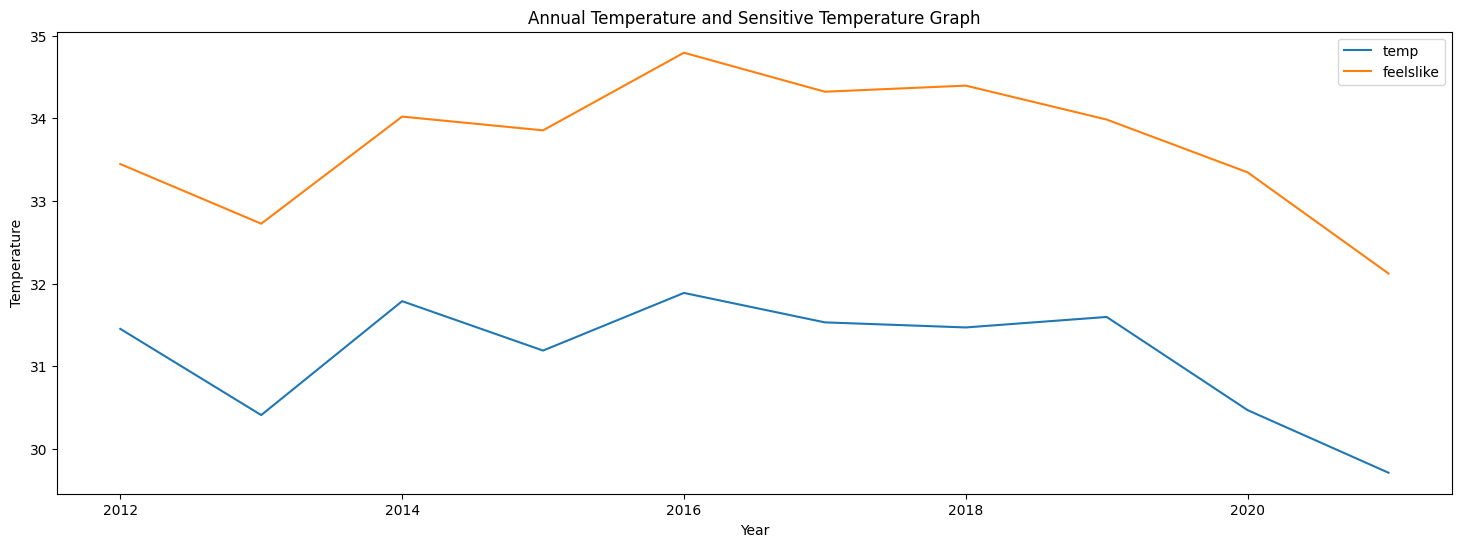

In [16]:
# 연간 기온과 체감온도 그래프
# 2012년부터 2018년까지의 연간 어떻게 온도를 가지는지 살펴보고 실제 기온과 체감 온도의 차이를 살펴봅시다.

plt.figure(figsize=(18,6))
plt.plot(df_dropna.groupby('Year')['temp'].mean(), label='temp')
plt.plot(df_dropna.groupby('Year')['feelslike'].mean(), label='feelslike')
plt.title('Annual Temperature and Sensitive Temperature Graph')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(['temp','feelslike'], loc=0) # 0: 'best'
plt.show()

연간 기온과 체감온도를 나타낸 그래프이다. 2012년~2020년간 인도 평균 온도 변화를 보여주고 있다.

> 간단한 그래프를 해석과 분석
  1. 2012년~2016년에는 기온과 체감온도가 점점 오르는 것을 확인 할 수 있다.
  2. 2016년~2020년에는 기온과 체감온도가 점점 감소하는 것을 확인할 수 있다.
  3. 평균적으로 일반적인 기온과 사람들이 느끼는 체감 온도는 2~3도 다르다는 결과를 도출 할 수 있었다.

#### 3-1-3. 연도별 온도에 따른 도시 별 습도 그래프

City  Year  Ahmedabad  Bengaluru  Bhopal  Chennai  Hyderabad  Indore  Jaipur  \
0     2012       45.8       60.0    37.9     61.5       43.5    38.5    35.9   
1     2013       49.2       63.7    45.2     63.8       46.9    47.7    28.9   
2     2014       42.7       60.2    36.0     65.1       40.0    37.0    29.9   
3     2015       47.4       72.8    40.8     69.6       52.7    42.1    35.8   
4     2016       44.5       64.9    37.9     69.2       50.9    40.5    28.2   

City  Kanpur  Kolkata  Lucknow  Mumbai  New Delhi  Patna  Pune  Surat  
0       40.5     71.8     40.3    74.6       34.3   44.9  53.1   71.8  
1       56.6     75.2     56.6    73.1       41.4   58.5  56.7   73.4  
2       42.1     70.9     41.7    70.1       39.9   47.4  52.9   69.2  
3       48.9     75.0     48.5    74.8       44.3   54.6  59.1   73.8  
4       47.4     71.8     47.0    73.1       42.1   55.5  53.8   71.2  


<Axes: xlabel='Year'>

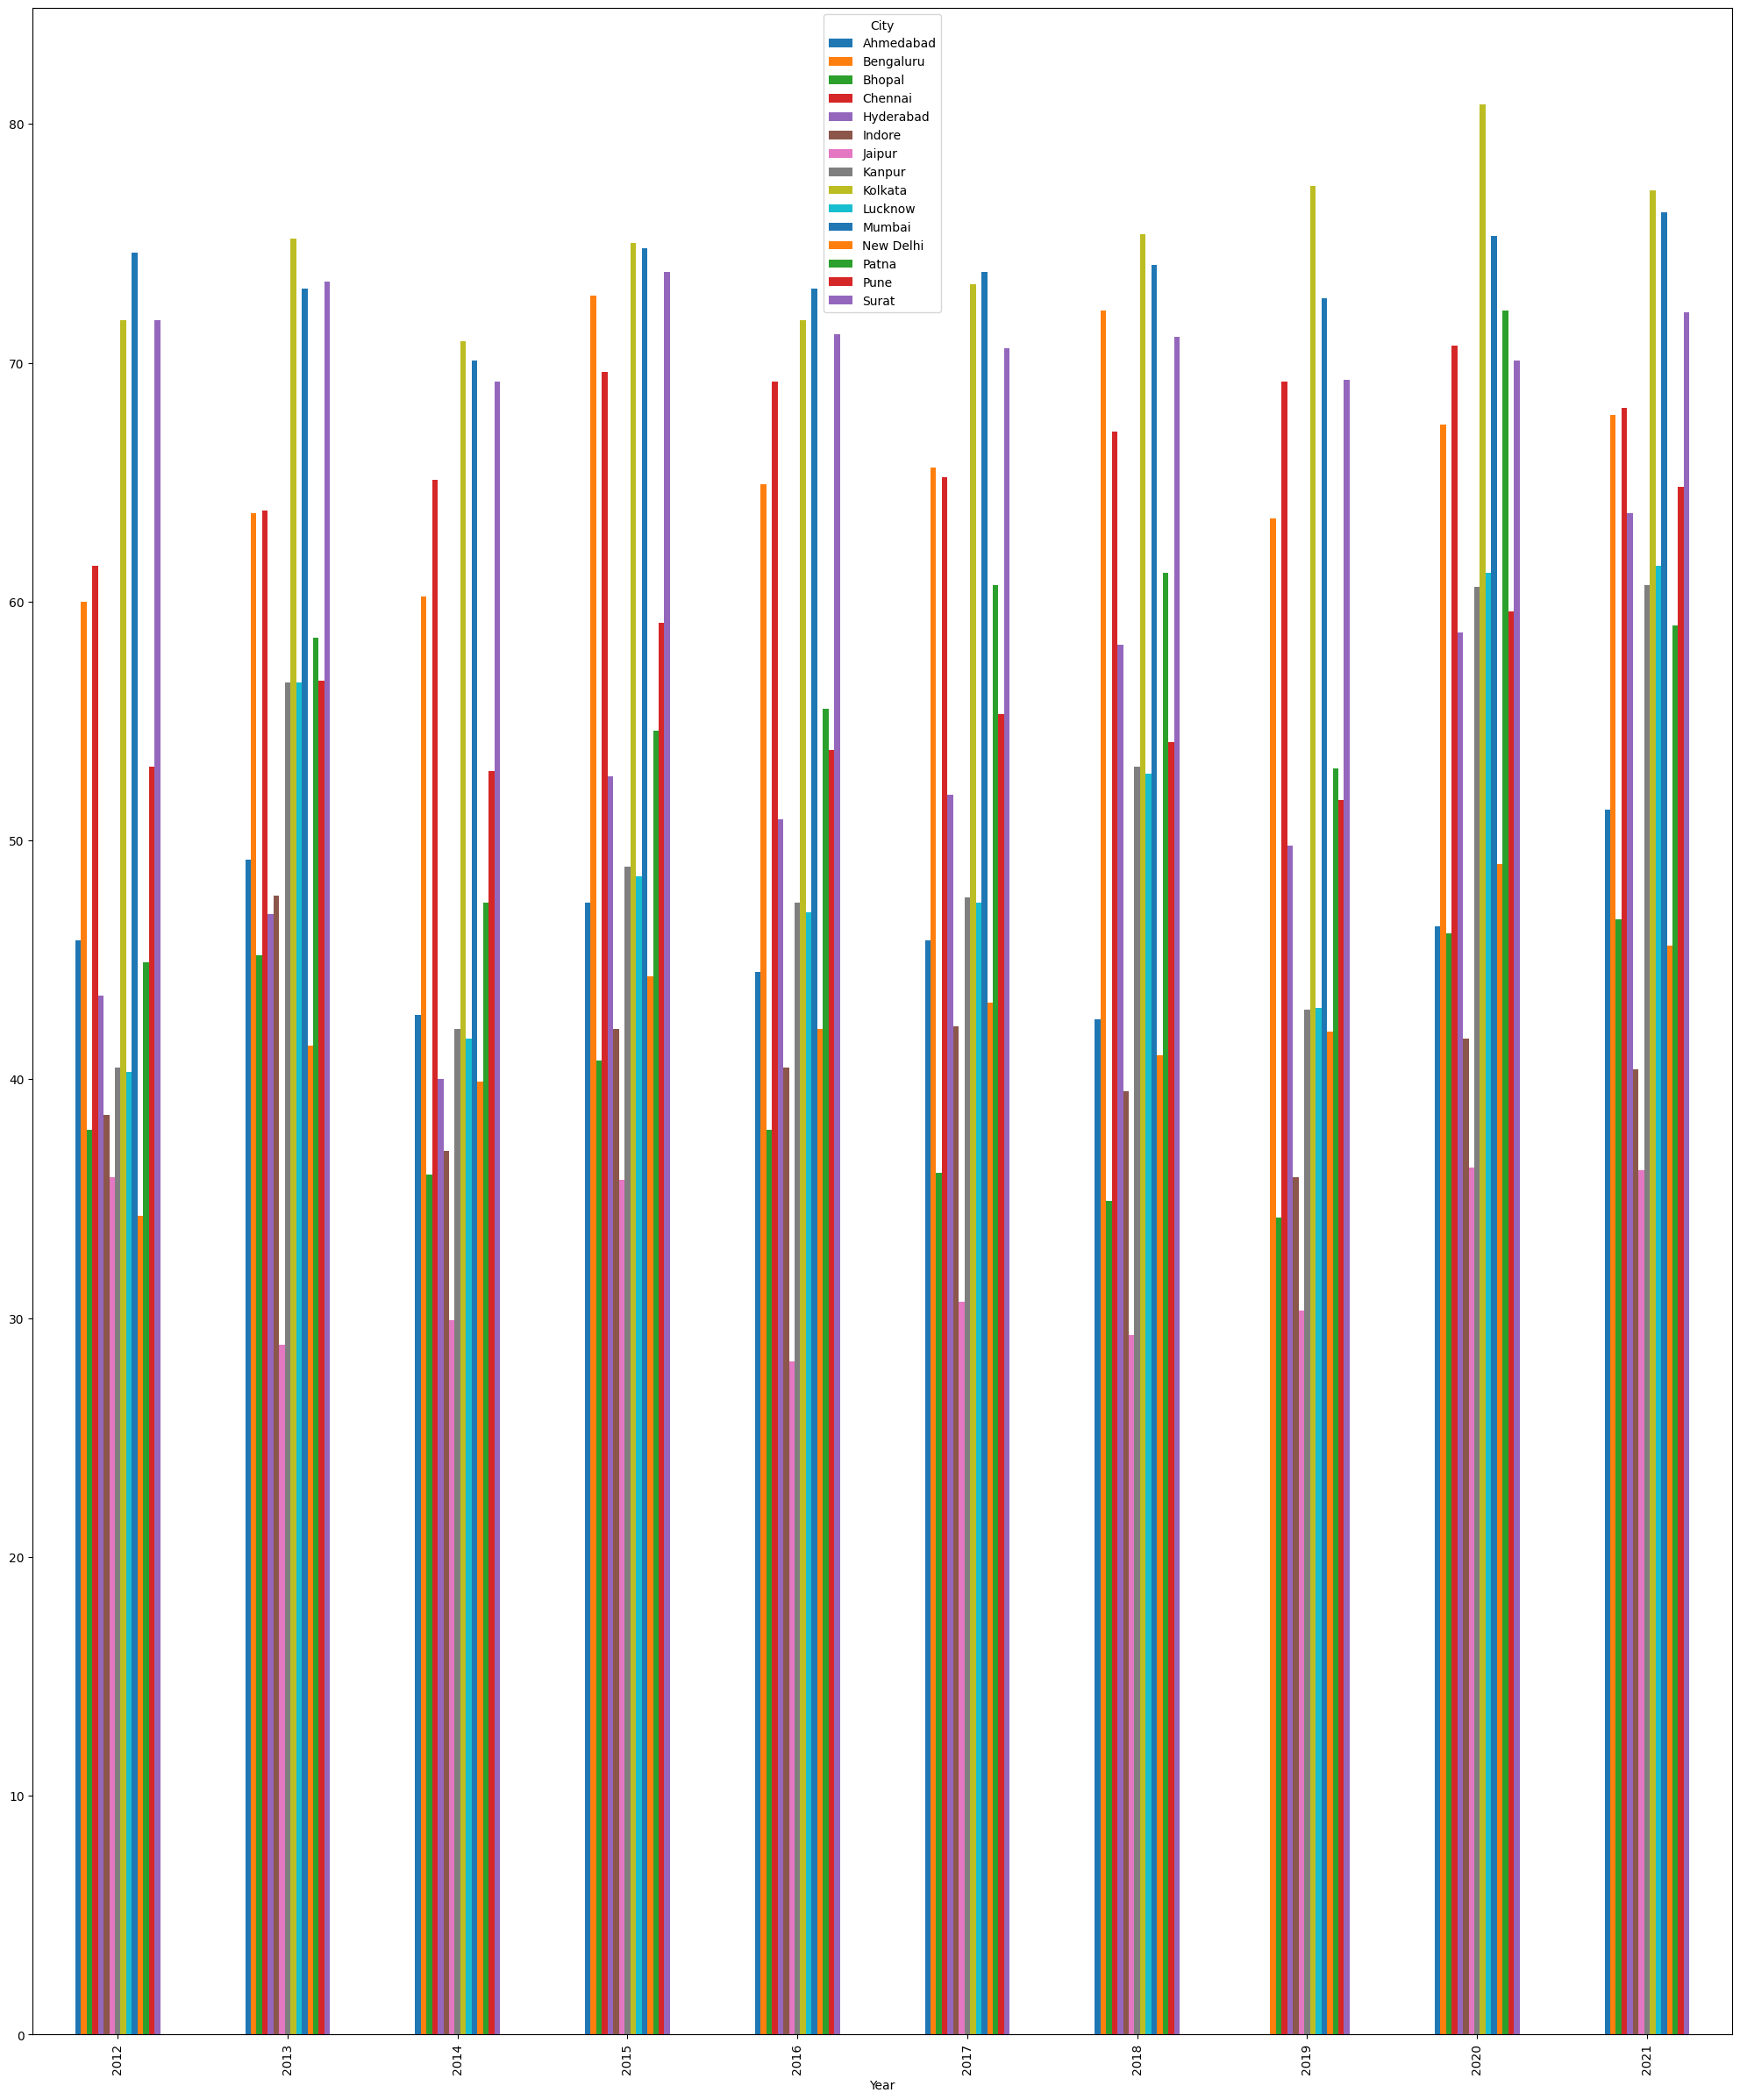

In [17]:
# 연도별 온도에 따른 도시 별 습도 그래프
# 연도 별, 국가 별 습도 데이터 가공
df_dropna_hum = df_dropna.groupby(['Year', 'City'])['humidity'].mean().reset_index()
df_dropna_hum['humidity'] = df_dropna_hum['humidity'].apply(lambda x: round(x, 1)) # 'humidity' 열의 값을 반올림하여 소수점 이하 한 자리까지 표시
# print(df_dropna_hum.head())


# 국가를 컬럼으로 피벗
df_dropna_hum_pv = df_dropna_hum.pivot(index='Year', 
                             columns='City', 
                             values='humidity').reset_index()
print(df_dropna_hum_pv.head())

df_dropna_hum_pv.plot.bar(x='Year', figsize=(25,30))

연도별 온도에 따른 도시 별 습도 그래프이다. 

> 간단한 그래프를 해석과 분석
  1. 앞서 말한 Ahmedabad, Chennai, Kolkata, Surat, Bhopal, Hyderabad ,Indore, Jaipur, Kanpur City, Lucknow, Mumbai, New Delhi, Patna의 일반적으로 더운 도시들은 평균 습도가 높은 것을 확인할 수 있었다. 
  2. Kolkata는 2020년까지 서서히 습도가 오르는 것을 볼 수 있는데 이는 앞에 시각화를 한 기온 그래프를 확인해보면 Kolkata는 정말 서서히 온도가 오르는 것을 확인할 수 있다.
  3. 앞서 말한 Bengaluru, Pune같은 평균적으로 25도 아래인 인도에서 그나마 시원한 도시는 평균 습도가 낮은 것을 확인할 수 있었다.  

### 3-2. 분포 시각화

#### 3-2-1. 해수면의 변화로 각 도시 별 날씨 특징 그래프

In [18]:
# 해수면의 변화로 각 도시 별 날씨 특징을 알 수 있는 그래프
fig = px.treemap(df_dropna,
                 path=['City','conditions'],
                 values='sealevelpressure',
                 color='sealevelpressure',
                 color_continuous_scale='IceFire')

fig.show()

해수면의 변화로 각 도시 별 날씨 특징을 알 수 있는 그래프이다.

> 간단한 그래프를 해석과 분석
  1. 도시 Pune, Surat, Mumbai, Ahmedabad는 일반적으로 해수면 기압이 높은 편에 속하며 높을 수록 평균적으로 높은 확률로 Clear한 날씨를 확인할 수 있었다.
  2. 도시 Hyderabad, Chennai, Bengaluru는 평균적으로 Parially cloudy한 날씨인 확률이 높다는 것을 알았다.
  3. 이외 도시들은 전부 해수면 기압이 낮아서 Clear보다는 보통 대게 Partially cloudy한 날씨임을 알 수 있다. 

확실히 treemap 그래프를 활용하니 시각적으로 보기 편하고 분석도 쉽게 할 수 있는 큰 장점이 있음을 알았다.

#### 3-2-2. 각 도시 월 별 이슬점 비교 그래프

In [19]:
# Negative value is not acceptable 오류가 떠서 dew 데이터에 음수가 존재한다는 것을 알았다.
# 그래서 dew열에서 음수를 찾기로 했다. 그리고 그냥 0으로 변경하여 전처리 하기로 했다.
# dew열에서 음수를 찾음
for i in range(len(df_dropna.index)):
    if df_dropna.iloc[i, df_dropna.columns.get_loc('dew')] < 0:
        print(f"({df_dropna.columns.get_loc('dew')}, {i})")

# dew열에서 음수를 찾아 0으로 바꿈
for i in range(len(df_dropna.index)):
    if df_dropna.iloc[i, df_dropna.columns.get_loc('dew')] < 0:
        df_dropna.iloc[i, df_dropna.columns.get_loc('dew')] = 0

# 혹시 모르니 dew열에서 음수 전처리를 실패할 경우를 위해 코드 작성함
for i in range(len(df_dropna.index)):
    if df_dropna.iloc[i, df_dropna.columns.get_loc('dew')] < 0:
        print(f"전처리 실패: ({df_dropna.columns.get_loc('dew')}, {i})")

# 연도 별, 도시 별 이슬점 데이터 가공
df_dropna_dew = df_dropna.groupby(['Month', 'City'])['dew'].mean().reset_index()
df_dropna_dew['dew'] = df_dropna_dew['dew'].apply(lambda x: round(x, 0)) # 'dew' 열의 값을 반올림하여 소수점 이하 한 자리까지 표시
df_dropna_dew['dew'] = df_dropna_dew['dew'].astype(int) # 정수형으로 타입 변경
# 국가를 컬럼으로 피벗
df_dropna_dew_pv = df_dropna_dew.pivot(index='Month', 
                             columns='City', 
                             values='dew').reset_index()

# df_dropna_dew_pv.set_index('Month', inplace=True)

# grouped_df = df.groupby(['col1', 'col2'])
print(df_dropna_dew_pv.head())

(8, 1601)
(8, 1804)
(8, 1844)
(8, 2821)
(8, 4885)
(8, 5744)
(8, 5755)
(8, 5770)
(8, 5814)
(8, 5838)
(8, 5846)
(8, 5868)
(8, 6875)
(8, 6889)
(8, 6896)
(8, 6897)
(8, 6905)
(8, 6912)
(8, 6913)
(8, 6922)
(8, 6926)
(8, 6947)
(8, 6967)
(8, 6975)
(8, 7003)
(8, 7242)
(8, 8192)
(8, 8441)
(8, 8457)
(8, 8486)
(8, 8507)
(8, 8981)
(8, 10037)
(8, 12237)
(8, 12250)
(8, 12252)
(8, 12275)
(8, 12284)
(8, 12291)
(8, 12606)
(8, 12610)
(8, 12614)
(8, 12630)
(8, 12634)
(8, 12646)
City  Month  Ahmedabad  Bengaluru  Bhopal  Chennai  Hyderabad  Indore  Jaipur  \
0         4         14         17      10       25         16       8       7   
1         5         19         20      13       25         17      13      11   
2         6         24         20      21       23         21      21      18   

City  Kanpur  Kolkata  Lucknow  Mumbai  New Delhi  Patna  Pune  Surat  
0         14       23       14      23         12     16    13     21  
1         19       25       19      25         14     21    18     2

In [20]:
# 위 결과를 바탕으로 데이터프레임 생성
# 와플 차트는 카테고리별 값을 블록으로 시각화한 차트이므로, 데이터프레임을 먼저 카테고리 형태로 전처리해야 한다.
data = {'City': ['Ahmedabad', 'Bengaluru', 'Bhopal', 'Chennai', 'Hyderabad', 'Indore', 'Jaipur', 'Kanpur', 'Kolkata', 'Lucknow', 'Mumbai', 'New Delhi', 'Patna', 'Pune', 'Surat'],
        '4월': [14, 17, 10, 25, 16, 8, 7, 14, 23, 14, 23, 12, 16, 13, 21],
        '5월': [19, 20, 13, 25, 17, 13, 11, 19, 25, 19, 25, 14, 21, 18, 25],
        '6월': [24, 20, 21, 23, 21, 21, 18, 24, 26, 24, 26, 21, 24, 21, 26]}
df_dew = pd.DataFrame(data)

df_dew.head()

,City,4월,5월,6월
0,Ahmedabad,14,19,24
1,Bengaluru,17,20,20
2,Bhopal,10,13,21
3,Chennai,25,25,23
4,Hyderabad,16,17,21


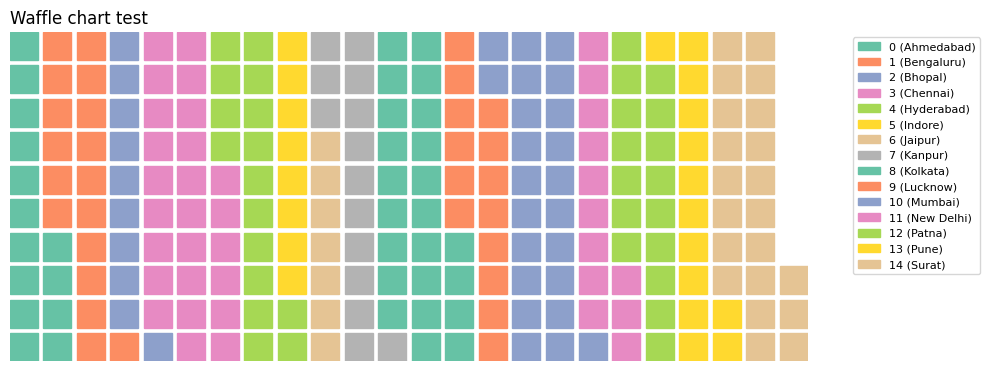

In [21]:
# 와플차트 시각화_각 나라 별_이슬점_4월
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': df_dew['4월'],
            'labels': ["{0} ({1})".format(n, v) for n, v in df_dew['City'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Waffle chart test', 'loc': 'left'}
        }
    },
    rows=10,
    figsize=(10, 10) 
)

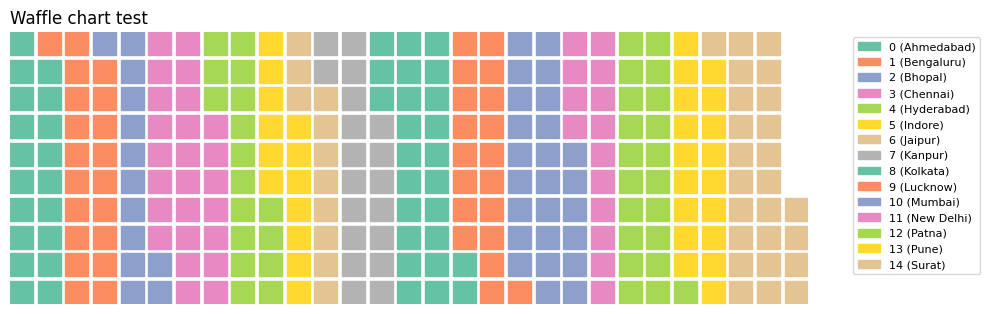

In [22]:
# 와플차트 시각화_각 나라 별_이슬점_5월
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': df_dew['5월'],
            'labels': ["{0} ({1})".format(n, v) for n, v in df_dew['City'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Waffle chart test', 'loc': 'left'}
        }
    },
    rows=10,
    figsize=(10, 10) 
)

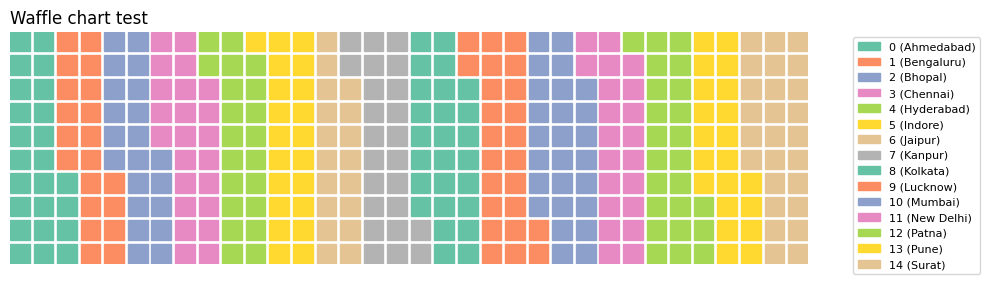

In [23]:
# 와플차트 시각화_각 나라 별_이슬점_6월
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': df_dew['6월'],
            'labels': ["{0} ({1})".format(n, v) for n, v in df_dew['City'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Waffle chart test', 'loc': 'left'}
        }
    },
    rows=10,
    figsize=(10, 10) 
)

각 도시 월 별 이슬점 비교 그래프로 와플 차트 그래프를 활용하였다. 

> 와플 그래프는 이슬점이 어디 도시가 높은지 정확하고 쉽게 알 수 있게 해주는데 도움을 크게 주었다. 그러다보니 분석도 매우 간단한데 각 나라 별로 월 마다 점점 이슬점이 증가하는 것을 확인할 수 있다. 즉, 여름 초기인 4월에는 이슬점이 5월, 6월 완전한 여름으로 가면서 이슬점이 점점 증가함을 알 수 있었다. 여름에 왜 비도 자주 오는지도 알 수 있었던 것 같다. 

### 3-3. 관계 시각화

In [24]:
# 공분산 확인
df_dropna.cov()

<ipython-input-24-d78cf57c7173>:2: FutureWarning:

The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,Month,Year
tempmax,15.951156,5.134516,10.929562,11.400094,5.102352,8.819534,-9.318035,-56.451345,0.379315,20.724495,-3.258805,-55.046329,-0.614022,-0.014658,-0.432972,-0.824221
tempmin,5.134516,9.819145,6.874471,10.813534,13.951129,11.992436,5.995043,-1.981666,2.436067,9.573599,-4.071411,-3.260323,-1.046521,-0.022505,0.871045,-0.648147
temp,10.929562,6.874471,9.453411,10.609237,8.461454,10.244550,-3.460713,-35.390469,1.399335,14.834896,-3.684199,-34.211571,-0.946953,-0.016142,0.113794,-0.797991
feelslikemax,11.400094,10.813534,10.609237,27.857189,17.721078,22.448026,14.073100,8.555286,1.169230,-66.945409,-6.686514,-13.567023,-1.832913,-0.016982,1.132958,0.234843
feelslikemin,5.102352,13.951129,8.461454,17.721078,23.535996,19.838157,14.228553,15.559545,2.256768,-7.050984,-4.929023,1.315638,-1.344671,-0.025184,1.391564,-0.729309
feelslike,8.819534,11.992436,10.244550,22.448026,19.838157,21.775169,13.356865,7.756495,1.115951,-39.263953,-5.695387,-12.297618,-1.598824,-0.013670,1.171846,-0.343357
dew,-9.318035,5.995043,-3.460713,14.073100,14.228553,13.356865,35.232222,102.553213,-0.464260,-87.579787,-3.208003,68.266476,-0.209885,0.013244,2.282872,0.964801
humidity,-56.451345,-1.981666,-35.390469,8.555286,15.559545,7.756495,102.553213,381.005230,-5.078493,-260.308986,0.173239,288.009353,1.354484,0.036877,6.137637,5.753535
windspeed,0.379315,2.436067,1.399335,1.169230,2.256768,1.115951,-0.464260,-5.078493,97.723380,64.152444,-5.753927,18.504834,-0.852895,-0.067830,0.899158,-1.836688
winddir,20.724495,9.573599,14.834896,-66.945409,-7.050984,-39.263953,-87.579787,-260.308986,64.152444,4118.744297,4.250792,-175.206714,17.270224,-0.022832,3.201475,-31.110262


In [25]:
# 피어슨 상관계수 확인
df_dropna.corr(method='pearson')

<ipython-input-25-ab6249048769>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,Month,Year
tempmax,1.000000,0.410267,0.890046,0.540809,0.263335,0.473226,-0.393059,-0.724124,0.009607,0.080855,-0.220579,-0.558507,-0.111198,-0.011910,-0.133499,-0.071918
tempmin,0.410267,1.000000,0.713523,0.653826,0.917712,0.820143,0.322319,-0.032399,0.078642,0.047605,-0.351245,-0.042162,-0.241556,-0.023305,0.342309,-0.072082
temp,0.890046,0.713523,1.000000,0.653764,0.567263,0.714032,-0.189627,-0.589694,0.046039,0.075181,-0.323929,-0.450895,-0.222762,-0.017037,0.045576,-0.090447
feelslikemax,0.540809,0.653826,0.653764,1.000000,0.692078,0.911441,0.449212,0.083043,0.022409,-0.197638,-0.342478,-0.104163,-0.251178,-0.010441,0.264338,0.015506
feelslikemin,0.263335,0.917712,0.567263,0.692078,1.000000,0.876303,0.494111,0.164310,0.047057,-0.022646,-0.274660,0.010989,-0.200474,-0.016845,0.353225,-0.052389
feelslike,0.473226,0.820143,0.714032,0.911441,0.876303,1.000000,0.482229,0.085157,0.024192,-0.131108,-0.329947,-0.106791,-0.247815,-0.009506,0.309246,-0.025642
dew,-0.393059,0.322319,-0.189627,0.449212,0.494111,0.482229,1.000000,0.885144,-0.007912,-0.229907,-0.146105,0.466051,-0.025575,0.007240,0.473615,0.056645
humidity,-0.724124,-0.032399,-0.589694,0.083043,0.164310,0.085157,0.885144,1.000000,-0.026319,-0.207798,0.002399,0.597912,0.050190,0.006131,0.387213,0.102721
windspeed,0.009607,0.078642,0.046039,0.022409,0.047057,0.024192,-0.007912,-0.026319,1.000000,0.101119,-0.157350,0.075855,-0.062403,-0.022265,0.112009,-0.064748
winddir,0.080855,0.047605,0.075181,-0.197638,-0.022646,-0.131108,-0.229907,-0.207798,0.101119,1.000000,0.017906,-0.110628,0.194636,-0.001154,0.061430,-0.168932


1. 동일한 변수 간에는 상관계수가 1로 나오고 있고, -1~1 사이의 값을 가지고 있음
2. 어떤 변수 간에 상관성이 높고 낮은지 쉽게 알 수 있음 
3. cov() 함수와 corr() 함수는 알아서 문자형 변수를 제외하고 변수 간 상관관계를 계산함. 따라서 별도로 변수 선택 과정을 해주지 않아도 무방.
4. 고유번호와 같은 숫자형 임에도 수치적 의미가 없는 변수는 가독성을 위해 drop() 함수로 사전에 제거해 주는 것이 좋음.

> 이러한 이유로 Month와 Year을 drop()

In [26]:
# Month와 Year을 drop()
df_dropna2 = df_dropna.drop('Month', axis=1)
df_dropna2 = df_dropna2.drop('Year', axis=1)
df_dropna2.corr(method='pearson')

<ipython-input-26-020c87e97514>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
tempmax,1.000000,0.410267,0.890046,0.540809,0.263335,0.473226,-0.393059,-0.724124,0.009607,0.080855,-0.220579,-0.558507,-0.111198,-0.011910
tempmin,0.410267,1.000000,0.713523,0.653826,0.917712,0.820143,0.322319,-0.032399,0.078642,0.047605,-0.351245,-0.042162,-0.241556,-0.023305
temp,0.890046,0.713523,1.000000,0.653764,0.567263,0.714032,-0.189627,-0.589694,0.046039,0.075181,-0.323929,-0.450895,-0.222762,-0.017037
feelslikemax,0.540809,0.653826,0.653764,1.000000,0.692078,0.911441,0.449212,0.083043,0.022409,-0.197638,-0.342478,-0.104163,-0.251178,-0.010441
feelslikemin,0.263335,0.917712,0.567263,0.692078,1.000000,0.876303,0.494111,0.164310,0.047057,-0.022646,-0.274660,0.010989,-0.200474,-0.016845
feelslike,0.473226,0.820143,0.714032,0.911441,0.876303,1.000000,0.482229,0.085157,0.024192,-0.131108,-0.329947,-0.106791,-0.247815,-0.009506
dew,-0.393059,0.322319,-0.189627,0.449212,0.494111,0.482229,1.000000,0.885144,-0.007912,-0.229907,-0.146105,0.466051,-0.025575,0.007240
humidity,-0.724124,-0.032399,-0.589694,0.083043,0.164310,0.085157,0.885144,1.000000,-0.026319,-0.207798,0.002399,0.597912,0.050190,0.006131
windspeed,0.009607,0.078642,0.046039,0.022409,0.047057,0.024192,-0.007912,-0.026319,1.000000,0.101119,-0.157350,0.075855,-0.062403,-0.022265
winddir,0.080855,0.047605,0.075181,-0.197638,-0.022646,-0.131108,-0.229907,-0.207798,0.101119,1.000000,0.017906,-0.110628,0.194636,-0.001154


결과는 성공적으로 Year와 Month를 drop 시켰다.

#### 3-3-1. 기본 히트맵 시각화

<ipython-input-27-e8fc4625b115>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

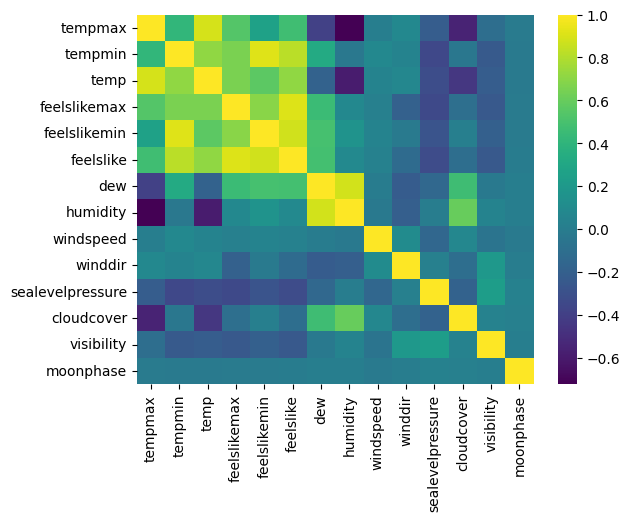

In [27]:
# 기본 히트맵 시각화
sns.heatmap(df_dropna2.corr(), cmap='viridis')

- 히트맵(Heatmap)은 그래프 중 하나이다. 히트맵은 각각의 데이터를 색상으로 나타내어 시각적으로 이해하기 쉽게 만들어진 그래프이다.
1. 노란색에 가까울수록 양의 상관관계를 보이고 보라색에 가까울수록 음의 상관관계를 보임.
2. 한눈에 어떤 변수 간에 상관성이 높은지 파악할 수 있다. 하지만 정확한 수치가 나오지 않아 불편한 면이 있었음.

> 그러므로 clustermap 히트맵으로 확인

#### 3-3-2. clustermap 히트맵 시각화

<ipython-input-28-55ecf92bb0fc>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



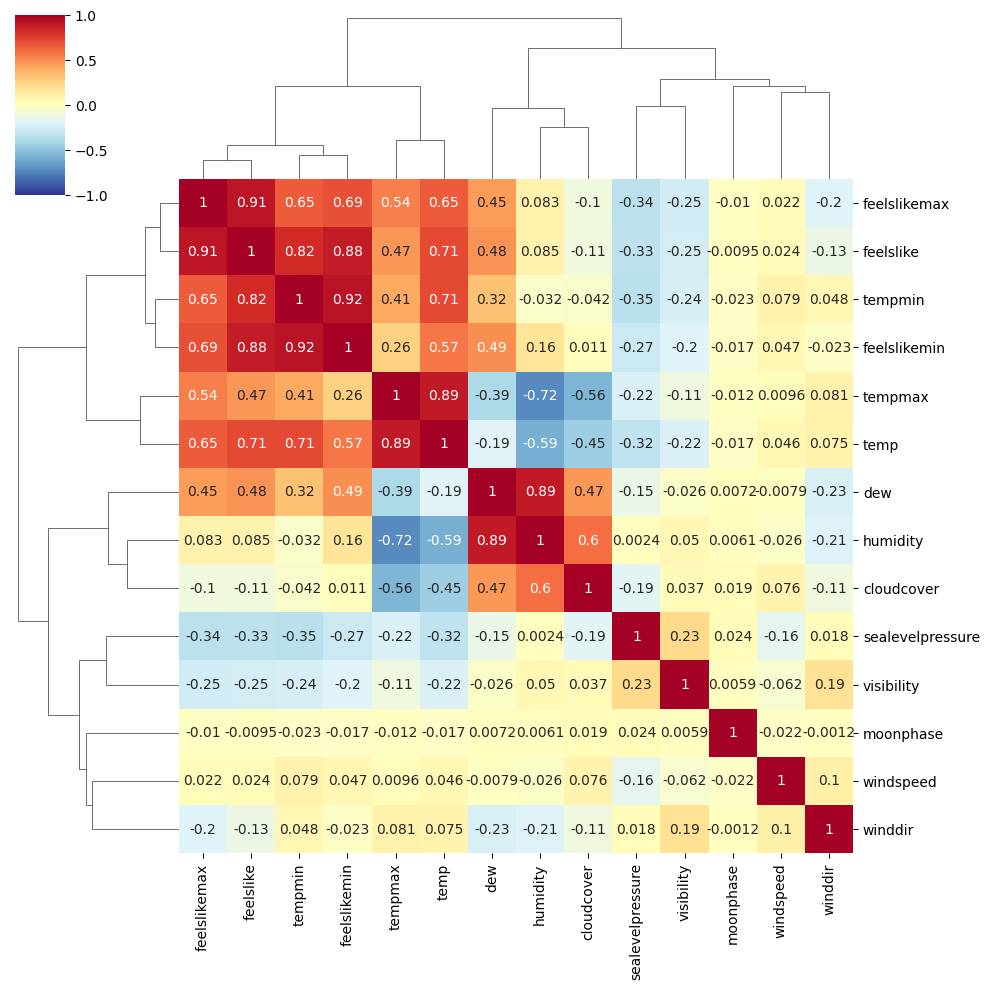

In [28]:
# clustermap 히트맵 시각화
sns.clustermap(df_dropna2.corr(), 
               annot = True,      
               cmap = 'RdYlBu_r',  
               vmin = -1, vmax = 1,
              )

1. 히트맵과 함께 상관계수도 확인할 수 있게 됐음.
2. temp 변수와 feelslike 변수의 상관계수는 0.71로 강한 양의 상관관계를 나타내는 것을 직관적으로 알 수 있다. 
3. dew와 visibility(대기의 투명도를 거리: 시정)은 강한 음의 상관관계를 보인다. 즉, 대기의 투명도가 높을수록 이슬점이 낮은 경향이 있다는 것을 알 수 있고 반대로 대기의 투명도가 낮을수록 이슬점이 높은 경향이 있다는 것을 알 수 있다.(간단하게 해석하면 날씨 좋으면 이슬점이 낮은거고 날씨가 흐리면 흐릴 수록 높은 이슬점을 갖는다는 것을 알 수 있다.)
  
> clustermap은 기존 히트맵에 상관성이 강한 변수들끼리 묶어서 표현해 주는 기능이 추가되어 있음. 끝으로 히트맵의 가독성을 높여보기로 결정함. 상관도 히트맵은 동일한 변수 조합이 두 번씩 나와서 보기 불편함. 그래서 중복되는 부분은 제외하고 시각화하는 방법을 사용하면 깔끔하게 상관성을 확인할 수 있음. 우선 중복되는 영역을 구분한 뒤, 그 부분을 제외한 영역에만 히트맵을 그리는 프로세스로 시각화 하기로 결정

#### 3-3-3. 중복 제거 히트맵 시각화

<ipython-input-29-d343c76e90aa>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-29-d343c76e90aa>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-29-d343c76e90aa>:6: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<ipython-input-29-d343c76e90aa>:10: FutureWarning:

The default value of numeric_only 

Text(0.5, 1.0, 'Wine Quality Correlation')

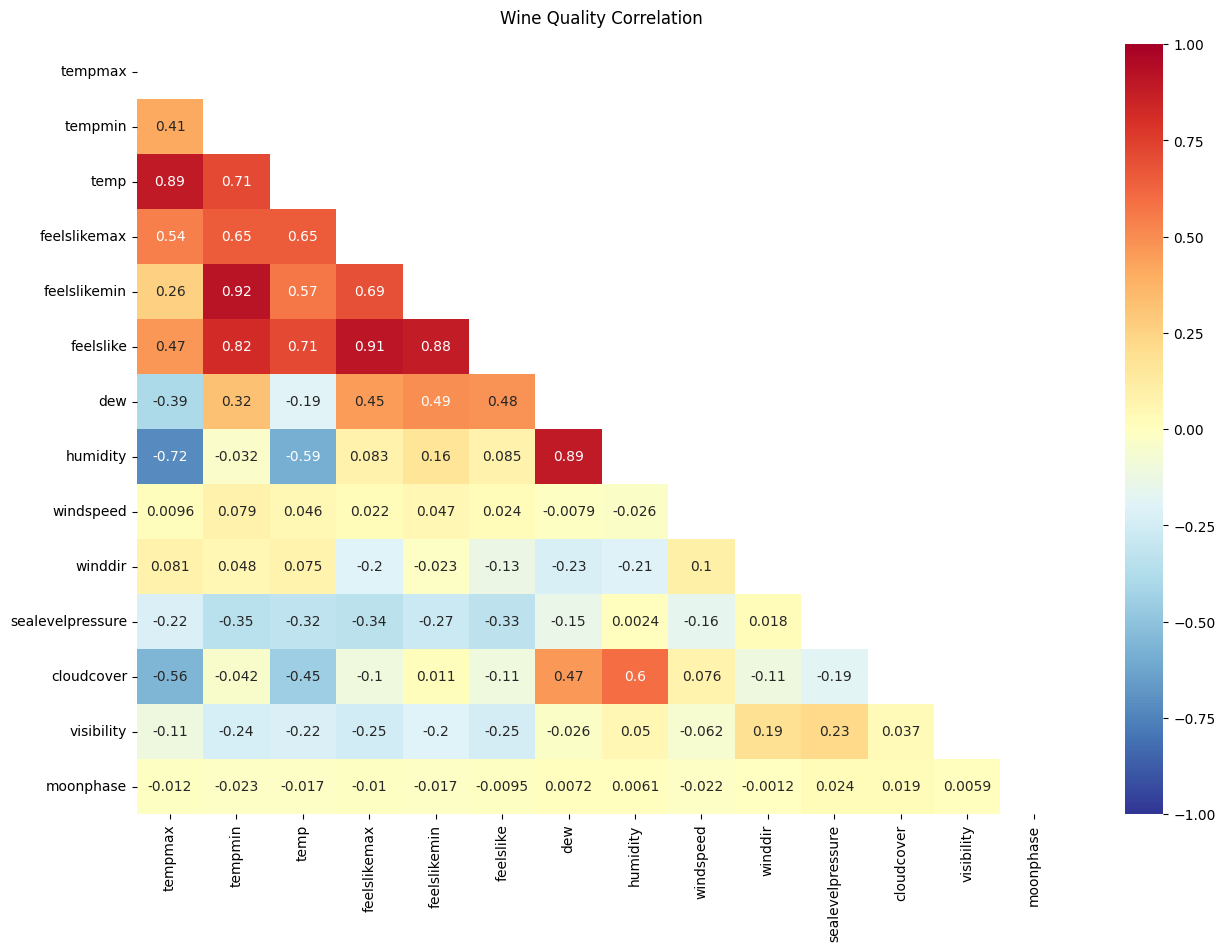

In [29]:
# 중복 제거 히트맵 시각화
# 매트릭스의 우측 상단을 모두 True인 1로, 하단을 False인 0으로 변환.
np.triu(np.ones_like(df_dropna2.corr()))

# True/False mask 배열로 변환.
mask = np.triu(np.ones_like(df_dropna2.corr(), dtype=np.bool))

#  히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_dropna2.corr(), 
            mask=mask, 
            vmin=-1, 
            vmax = 1, 
            annot=True, 
            cmap="RdYlBu_r", 
            cbar = True)
ax.set_title('Wine Quality Correlation', pad = 15)

중복 제거 히트맵 시각화를 통해 상관관계를 더욱 더 알아보기 쉬워졌다!

#### 3-3-4. 운량에 따른 습도와 체감온도 변화 그래프

In [30]:
# 버블차트 애니매이션을 활용한 시각화
# cloudcover를 오름차순으로 정렬함.
df_dropna2_sorted = df_dropna2.sort_values(by='cloudcover')
df_dropna2_sorted.head()

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
10492,New Delhi,2014-04-28,41.0,21.0,32.8,37.9,21.0,31.2,7.4,23.96,24.8,268.8,1005.9,0.0,2.7,2014-04-28 05:43:16,2014-04-28 18:54:28,1.00,Clear,Clear conditions throughout the day.
4260,Jaipur,2018-06-14,39.2,30.0,34.8,40.9,30.8,35.7,17.3,36.72,31.7,267.0,994.9,0.0,2.4,2018-06-14 05:32:25,2018-06-14 19:21:39,0.00,Clear,Clear conditions throughout the day.
1,New Delhi,2021-04-02,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4,275.0,1006.2,0.0,3.5,2021-04-02 06:10:04,2021-04-02 18:39:46,0.65,Clear,Clear conditions throughout the day.
5077,New Delhi,2018-06-12,41.1,31.0,37.0,50.6,33.7,43.2,22.9,45.23,25.5,265.0,990.0,0.0,2.5,2018-06-12 05:22:45,2018-06-12 19:19:14,0.99,Clear,Clear conditions throughout the day.
912,Bhopal,2021-04-03,38.0,20.0,28.1,35.4,20.0,27.0,4.9,24.72,11.2,98.6,1008.4,0.0,4.9,2021-04-03 06:10:49,2021-04-03 18:36:49,0.70,Clear,Clear conditions throughout the day.


In [31]:
# 운량에 따른 습도와 체감온도 데이터
fig = px.scatter(df_dropna2_sorted,x="feelslike", y="humidity",
                 animation_frame="cloudcover",animation_group="City",
                 size="winddir",color="City",
                 hover_name="City", 
                 log_y=True, size_max=45, range_y=[1,150], range_x=[1,100]
 )
 
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 100
fig.show()

Output hidden; open in https://colab.research.google.com to view.

운량에 따른 습도와 체감온도 변화 그래프이다. 
- cloudcover와 humidity 상관계수가 0.6로 꽤나 강한 양의 상관관계를 보여주고 있고 cloudcover와 feelslike는 상관계수가 -0.11로 높은 음의 상관관계를 보여주고 있어서, 이를 버블차트 애니매이션으로 표현하면 재밌는 결과가 나올 것을 기대하여 그리게 되었다!

> 간단한 그래프를 해석과 분석
  1. Cloudcover(운량)이 증가함에 따라 서서히 원들 위치가 와이드하게 변하는 것을 확인할 수 있다. 즉, 모든 도시가 공통으로 운량 증가함에 따라 feelslike(체감온도)는 점점 좌측으로 떨어지는 것을 확인할 수 있고 humidity(습도)는 점점 오르는 것을 확인할 수 있다.
  2. 즉, 운량이 증가한다는 것은 구름이 점점 많아진다는 것이니 그만큼 흐리다는 것이고 비가 올 확률도 높다는 것이다. 그만큼 사람들의 체감온도는 떨어지는데 이는 보통 사람들은 운량이 적은 맑은 하늘에 높은 체감온도를 느낀다는 것이다. 
  3. 애니메이션 그래프라 그런지 보는 맛이 신선했고 데이터 분석에 매우 쉬웠다는 장점이 있었다. 분석하며 가장 재미있고 신기했던 그래프이다.